# PROBLEM STATEMENT

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers than post paid customers.  Also, prepaid is the most common model in India and Southeast Asia for which we are going to do the analysis.

# Business Goal
The business objective is to **predict the churn** of the **high value customers** in the last (i.e. the ninth) month using the data (features) from the first three months.

**High Value Customers** are the customers who are in and above 70th percentile of the average recharge amount in the first two months (the good phase).

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Importing the data

In [2]:
churn0 = pd.read_csv('telecom_churn_data.csv')

In [3]:
churn0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
churn0.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
pd.set_option('display.max_columns', None)
churn0.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

#### FILTER HIGH VALUE CUSTOMER

High-value customers are defined (as per the problem statement) as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [6]:
# CREATING NEW COLUMNS FOR AVERAGE RECHARGE VALUE OF FIRST TWO MONTHS
## FINDING THE COLUMNS THAT HAS RECHARGE INFORMATION
columns_with_recharge_info = [col for col in churn0.columns if 'rech' in col]
columns_with_recharge_info

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [7]:
## 'total_rech_amt_6' and total_rech_amt_7' are the required columns
churn0['avg_rech_amt_6_7'] = (churn0.total_rech_amt_6 + churn0.total_rech_amt_7)/2

## find out the 70th percentile of average recharge amount of 6 ant 7th month
churn0.avg_rech_amt_6_7.describe(percentiles = [0.7])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
50%        229.000000
70%        368.500000
max      37762.500000
Name: avg_rech_amt_6_7, dtype: float64

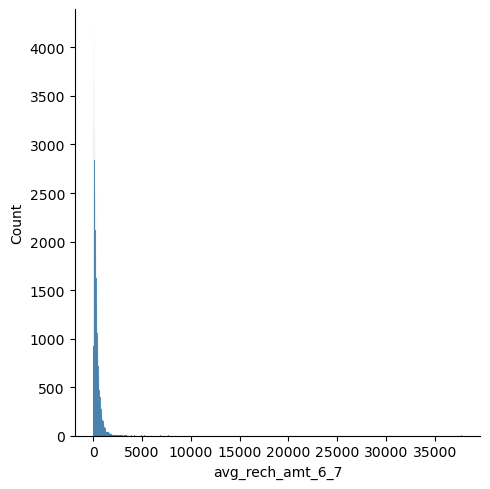

In [8]:
sns.displot(churn0.avg_rech_amt_6_7)

In [9]:
churn_high_value = churn0[churn0.avg_rech_amt_6_7>=368.5]
churn_high_value.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,

In [10]:
churn_high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 227 entries, mobile_number to avg_rech_amt_6_7
dtypes: float64(180), int64(35), object(12)
memory usage: 52.2+ MB


In [11]:
churn_high_value.drop_duplicates()
churn_high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 227 entries, mobile_number to avg_rech_amt_6_7
dtypes: float64(180), int64(35), object(12)
memory usage: 52.2+ MB


In [12]:
# NO DUPLICATE ENRTY

#### CREATE NEW COLUMNS FOR 9TH MONTH USAGE
CUSTOMERS WHO HAVE NOT MADE OR RECEIVED ANY CALLS OR USED ANY DATA IN THE 9TH MONTHS TO BE CONSIDERED AS CHURNED I.E.

total_ic_mou_9 + total_og_mou_9 + vol_2g_mb_9 + vol_3g_mb_9 SHOULD BE ZERO


In [13]:
churn_high_value['sep_usage'] = churn_high_value[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].sum(axis=1)

churn_high_value[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9','sep_usage' ]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,sep_usage
7,0.00,0.00,0.0,0.0,0.00
8,34.91,142.18,0.0,0.0,177.09
13,631.86,446.09,0.0,0.0,1077.95
16,334.56,255.74,0.0,0.0,590.30
17,87.13,631.08,0.0,0.0,718.21


In [14]:
churn_high_value.sep_usage.describe()

count    30011.000000
mean      1174.016686
std       1232.486199
min          0.000000
25%        425.620000
50%        893.170000
75%       1563.510000
max      39227.890000
Name: sep_usage, dtype: float64

In [15]:
# CREATING NEW COLUMN TO DENOTE CHURN IN SEPTEMBER
churn_high_value['sep_churn'] = 0 # ALL VALUES OF THIS COL IS SET TO 0 (NOT CHURN)
churn_high_value.loc[churn_high_value.sep_usage == 0, 'sep_churn']=1

In [16]:
churn_high_value[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9','sep_usage','sep_churn' ]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,sep_usage,sep_churn
7,0.00,0.00,0.0,0.0,0.00,1
8,34.91,142.18,0.0,0.0,177.09,0
13,631.86,446.09,0.0,0.0,1077.95,0
16,334.56,255.74,0.0,0.0,590.30,0
17,87.13,631.08,0.0,0.0,718.21,0


In [17]:
# CHECKIGN CLASS IMBALANCE OF DATA
churn_high_value.sep_churn.value_counts(normalize = True)

0    0.913598
1    0.086402
Name: sep_churn, dtype: float64

In [18]:
# REFER INSTRUCTIONS, AFTER CHURN IS LABELLED, WE NEED TO DISCARD ALL INFORMAITON BELONGING TO 9TH MONTH
# IDENTIFYING THE DATA RELATED TO 9TH MONTH
nineth_month_cols = [ cols for cols in churn_high_value.columns if '9' in cols]
nineth_month_cols = nineth_month_cols + ['sep_vbc_3g']
nineth_month_cols

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [19]:
# DELETE 9TH MONTH COLUMN
churn_high_value = churn_high_value.drop(nineth_month_cols, axis=1)
# THIS IS THE DATASET WHICH WE SHALL USE FOR PROCESSING

In [20]:
churn_high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 174 entries, mobile_number to sep_churn
dtypes: float64(137), int64(28), object(9)
memory usage: 40.1+ MB


In [21]:
# SAVING THE D.F. IN ANOTHER VARIABLE TO RESTORE IN CASE OF ERRORS
churn_high_value1 = churn_high_value 
churn_high_value1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,sep_usage,sep_churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1185.0,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.

# DATA CLEANING

In [22]:
# DELETING REDUNDANT COLUMNS
redundant_cols = ['mobile_number','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']
churn_high_value1 = churn_high_value1.drop(redundant_cols, axis = 1)

In [23]:
churn_high_value1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 170 entries, circle_id to sep_churn
dtypes: float64(137), int64(27), object(6)
memory usage: 39.2+ MB


In [24]:
# CHECKING NULL VALUES
pd.set_option('display.max_rows', None)
null_values = round(100*churn_high_value1.isnull().sum() / len(churn_high_value1),2)
null_values[null_values>0]

loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
loc_og_t2t_mou_6             1.05
loc_og_t2t_mou_7             1.01
loc_og_t2t_mou_8             3.13
loc_og_t2m_mou_6             1.05
loc_og_t2m_mou_7             1.01
loc_og_t2m_mou_8             3.13
loc_og_t2f_mou_6             1.05
loc_og_t2f_mou_7             1.01
loc_og_t2f_mou_8             3.13
loc_og_t2c_mou_6             1.05
loc_og_t2c_mou_7             1.01
loc_og_t2c_mou_8             3.13
loc_og_mou_6                 1.05
loc_og_mou_7                 1.01
loc_og_mou_8  

In [25]:
# Dropping the columns having more than 35% of the null values

cols_to_drop = churn_high_value1.loc[:, churn_high_value1.isnull().mean() > 0.35]

In [26]:
cols_to_drop_1 = list(cols_to_drop.keys())
churn_high_value1 = churn_high_value1.drop(cols_to_drop_1, axis=1)

In [27]:
# CHECKING NULL VALUES AGAIN
pd.set_option('display.max_rows', None)
null_values = round(100*churn_high_value1.isnull().sum() / len(churn_high_value1),2)
null_values[null_values>0]

loc_og_t2o_mou         0.38
std_og_t2o_mou         0.38
loc_ic_t2o_mou         0.38
onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
offnet_mou_6           1.05
offnet_mou_7           1.01
offnet_mou_8           3.13
roam_ic_mou_6          1.05
roam_ic_mou_7          1.01
roam_ic_mou_8          3.13
roam_og_mou_6          1.05
roam_og_mou_7          1.01
roam_og_mou_8          3.13
loc_og_t2t_mou_6       1.05
loc_og_t2t_mou_7       1.01
loc_og_t2t_mou_8       3.13
loc_og_t2m_mou_6       1.05
loc_og_t2m_mou_7       1.01
loc_og_t2m_mou_8       3.13
loc_og_t2f_mou_6       1.05
loc_og_t2f_mou_7       1.01
loc_og_t2f_mou_8       3.13
loc_og_t2c_mou_6       1.05
loc_og_t2c_mou_7       1.01
loc_og_t2c_mou_8       3.13
loc_og_mou_6           1.05
loc_og_mou_7           1.01
loc_og_mou_8           3.13
std_og_t2t_mou_6       1.05
std_og_t2t_mou_7       1.01
std_og_t2t_mou_8       3.13
std_og_t2m_mou_6       1.05
std_og_t2m_mou_7       1.01
std_og_t2m_mou_8    

In [28]:
null_values[null_values>0].info()

<class 'pandas.core.series.Series'>
Index: 93 entries, loc_og_t2o_mou to date_of_last_rech_8
Series name: None
Non-Null Count  Dtype  
--------------  -----  
93 non-null     float64
dtypes: float64(1)
memory usage: 1.5+ KB


In [29]:
## IMPUTING THE MISSING VALUES WITH MEDIAN

## DEFINE FUNCTION TO FILL NULL CELLS OF NUMERIC COLUMNS WITH MEDIAN
#def fillna_df_num(df):
            
#    for column in df.select_dtypes("number").columns:
#        df[column] = df[column].fillna(df[column].median())
#    return df

In [30]:
## FILL REMAINING NUMERIC NULL CELLS OF inp1 WITH MEDIAN
#fillna_df_num(churn_high_value1)

## CHECK inp1 AFTER FILLING NUMRIC NULL CEllS - ONLY OBJECT TYPE MISSING DATA
#null_values = round(100*churn_high_value1.isnull().sum() / len(churn_high_value1),2)
#null_values[null_values>0]

WE CAN IMPUTE THE MISSING VALUES WITH MEAN. HOWEVER SINCE THE DATA IS HEAVILITY IMBALANCED, THEREFORE, IMPUTING MAY RESULT IN MISLEADING PREDICTIONS. THEREFORE, WE SHALL DELETE THE ROWS CONTAINING MISSING DATA

In [31]:
churn_high_value1 = churn_high_value1.dropna()
pd.set_option('display.max_rows', None)
null_values = round(100*churn_high_value1.isnull().sum() / len(churn_high_value1),2)
null_values[null_values>0]

Series([], dtype: float64)

In [32]:
# CHECKIGN CLASS IMBALANCE OF DATA
churn_high_value1.sep_churn.value_counts(normalize = True)

0    0.938463
1    0.061537
Name: sep_churn, dtype: float64

FROM date_of_last_rech_6 , date_of_last_rech_7 , date_of_last_rech_8 - WE ONLY NEED TO USE THE DATE AND NOT ANY OTHER DATA

In [33]:
time_columns = ['date_of_last_rech_6' , 'date_of_last_rech_7' , 'date_of_last_rech_8']

In [34]:
churn_high_value1.date_of_last_rech_6 = pd.to_datetime(churn_high_value1.date_of_last_rech_6,format = '%m/%d/%Y')
churn_high_value1.date_of_last_rech_7 = pd.to_datetime(churn_high_value1.date_of_last_rech_7,format = '%m/%d/%Y')
churn_high_value1.date_of_last_rech_8 = pd.to_datetime(churn_high_value1.date_of_last_rech_8,format = '%m/%d/%Y')

In [35]:
# EXTRACTING DAYS FROM JUNE, JULY AND AUGUST DATA
churn_high_value1[['date_jun', 'date_jul', 'date_aug']] = churn_high_value1[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']].apply(lambda x: x.dt.date)


In [36]:
#churn_high_value1['date_jun'] = churn_high_value1.date_of_last_rech_6.dt.date
#churn_high_value1['date_jul'] = churn_high_value1.date_of_last_rech_7.dt.date
#churn_high_value1['date_aug'] = churn_high_value1.date_of_last_rech_8.dt.date

In [37]:
churn_high_value1[['date_jun', 'date_jul', 'date_aug']].head()

,date_jun,date_jul,date_aug
7,2014-06-27,2014-07-25,2014-08-26
8,2014-06-25,2014-07-31,2014-08-30
13,2014-06-20,2014-07-22,2014-08-30
16,2014-06-30,2014-07-31,2014-08-14
17,2014-06-30,2014-07-30,2014-08-25


CHURNERS ARE LIKELY NOT TO RECHARGE ON THE 2ND HALF OF THE 8TH MONTH. THERERFORE WHETHER RECHARGE WAS DONE IN THE 2ND HALF OR NOT MAY BE AN IMPORTANT INDICATOR OF CHURNING.

In [38]:
# DESIGNATING LAST RECHARGE WAS DONE ON 1ST HALF OR 2ND HALF OF THE MONTH
churn_high_value1[['rech_jun_first_half', 'rech_jul_first_half', 'rech_aug_first_half']] = (churn_high_value1[['date_jun', 'date_jul', 'date_aug']].apply(lambda x: np.where(pd.to_datetime(x).dt.day <= 15, 1, 0)))

In [39]:
churn_high_value1[['date_jun','rech_jun_first_half', 'date_jul','rech_jul_first_half','date_aug','rech_aug_first_half']].head()

,date_jun,rech_jun_first_half,date_jul,rech_jul_first_half,date_aug,rech_aug_first_half
7,2014-06-27,0,2014-07-25,0,2014-08-26,0
8,2014-06-25,0,2014-07-31,0,2014-08-30,0
13,2014-06-20,0,2014-07-22,0,2014-08-30,0
16,2014-06-30,0,2014-07-31,0,2014-08-14,1
17,2014-06-30,0,2014-07-30,0,2014-08-25,0


In [40]:
# DELETING REDUNDANT COLUMNS
redundant_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8', 'date_jun', 'date_jul', 'date_aug','sep_usage']
churn_high_value1 = churn_high_value1.drop(redundant_cols, axis = 1)

In [41]:
churn_high_value1.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,sep_churn,rech_jun_first_half,rech_jul_first_half,rech_aug_first_half
7,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,0,0,0
8,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,0,0,0
13,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393

In [42]:
churn_high_value1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28487 entries, 7 to 99997
Columns: 139 entries, circle_id to rech_aug_first_half
dtypes: float64(109), int32(3), int64(27)
memory usage: 30.1 MB


### Assessing the categorical variables

In [43]:
#?enumerate

In [44]:
cat_cols = churn_high_value1.select_dtypes("object").columns
cat_cols

Index([], dtype='object')

In [45]:
# NO CATAGORICAL COLUMNS

In [46]:
unique_values = churn_high_value1.nunique()
unique_values

circle_id                  1
loc_og_t2o_mou             1
std_og_t2o_mou             1
loc_ic_t2o_mou             1
arpu_6                 27940
arpu_7                 27957
arpu_8                 27765
onnet_mou_6            18293
onnet_mou_7            18530
onnet_mou_8            17463
offnet_mou_6           21711
offnet_mou_7           21989
offnet_mou_8           21241
roam_ic_mou_6           4197
roam_ic_mou_7           3539
roam_ic_mou_8           3620
roam_og_mou_6           4984
roam_og_mou_7           4237
roam_og_mou_8           4328
loc_og_t2t_mou_6       10942
loc_og_t2t_mou_7       11016
loc_og_t2t_mou_8       10706
loc_og_t2m_mou_6       16355
loc_og_t2m_mou_7       16575
loc_og_t2m_mou_8       16034
loc_og_t2f_mou_6        3194
loc_og_t2f_mou_7        3211
loc_og_t2f_mou_8        3085
loc_og_t2c_mou_6        1631
loc_og_t2c_mou_7        1722
loc_og_t2c_mou_8        1717
loc_og_mou_6           19199
loc_og_mou_7           19456
loc_og_mou_8           18686
std_og_t2t_mou

In [47]:
# DELETING REDUNDANT COLUMNS WHICH HAVE ONLY ONE UNIEQUE VALUE
redundant_cols = ['circle_id' , 'loc_og_t2o_mou' , 'std_og_t2o_mou' , 'loc_ic_t2o_mou', 'std_og_t2c_mou_6' , 'std_og_t2c_mou_7' , 'std_og_t2c_mou_8' , 'std_ic_t2o_mou_6' , 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
churn_high_value1 = churn_high_value1.drop(redundant_cols, axis = 1)
churn_high_value1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28487 entries, 7 to 99997
Columns: 129 entries, arpu_6 to rech_aug_first_half
dtypes: float64(100), int32(3), int64(26)
memory usage: 27.9 MB


In [48]:
churn_high_value1.monthly_2g_6.unique()

array([0, 2, 1, 3, 4], dtype=int64)

### Numerical variables

In [49]:
num_cols = churn_high_value1.select_dtypes('number').columns
num_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7', 'sep_churn', 'rech_jun_first_half',
       'rech_jul_first_half', 'rech_aug_first_half'],
      dtype='object', length=129)

**Creating dummy variables for the categorical variables**

In [50]:
# CREATION OF DUMMY VARIABLES FOR CTAGORICAL VARIABLES IS NOT REQUIRED FOR THIS PROBLEM

**Creating dummy features**

In [51]:
# CREATION OF DUMMY FEATURES FOR CTAGORICAL VARIABLES IS NOT REQUIRED FOR THIS PROBLEM

 **CHECKING CORRELATION BETWEEN THE VARIABLES**

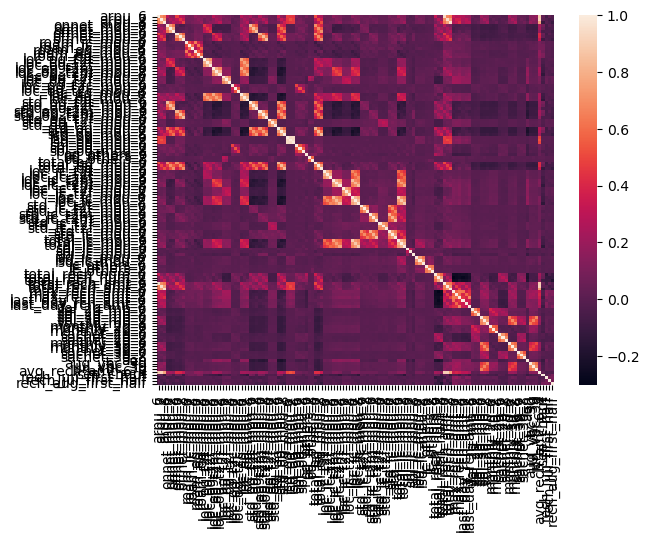

In [52]:
%matplotlib inline


corr = churn_high_value1.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

WE CAN IDENTIFY THE HIGHLY CORRELATED COLUMNS. WE SEE THAT FOR THE SAME VARIABLE, VALUES OF JUNE, JULY AND AUGUST ARE HIGHLY CORRELATED. OUT OF THE HIGHLY CORRELATED COLUMNS WE CAN KEEP THE MOST RECENT COLUMNS (I.E. VALUES OF AUGUST MONTH) AND DROP THE REST.

In [53]:
correlated_columns_to_drop = ['onnet_mou_6', 'onnet_mou_7',  'offnet_mou_6', 'offnet_mou_7', 'total_rech_amt_6', 'total_rech_amt_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',  'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6' , 'std_ic_t2f_mou_7' , 'std_ic_mou_6', 'std_ic_mou_7', 'total_ic_mou_6', 'isd_ic_mou_7', 'ic_others_6', 'ic_others_7', 'total_rech_num_6', 'total_rech_num_7', 'vol_3g_mb_6', 'vol_3g_mb_7', 'max_rech_amt_6', 'max_rech_amt_7', 'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'jun_vbc_3g', 'jul_vbc_3g']

In [54]:
churn_high_value1 = churn_high_value1.drop(correlated_columns_to_drop, axis = 1)
#churn_high_value1.shape()

# Creating histograms and boxplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(churn_high_value1[column], kde=True)
    plt.title('Histogram of ' + column)
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(churn_high_value1[column])
    plt.title('Boxplot of ' + column)
    
    plt.tight_layout()
    plt.show()

---

# Model building
 - dividing into train and test sets
 - MinMax scaling for numeric features
 - **HANDLING CLASS IMBALANCE**
 - build multiple predictive models

#### Dividing into train and test datasets

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
df_train, df_test = train_test_split(churn_high_value1, test_size=0.2, random_state=42, stratify=churn_high_value1.sep_churn)

In the context of the train-test split, **stratify** refers to the process of preserving the proportion of different classes or categories in the dataset when splitting it into training and testing sets. This ensures that the distribution of classes remains similar in both sets, which is useful for classification tasks.

In [57]:
df_train.shape, df_test.shape

((22789, 76), (5698, 76))

In [58]:
df_train.sep_churn.value_counts(normalize=True)

0    0.938479
1    0.061521
Name: sep_churn, dtype: float64

In [59]:
df_test.sep_churn.value_counts(normalize=True)

0    0.938399
1    0.061601
Name: sep_churn, dtype: float64

In [60]:
X_train = df_train.drop('sep_churn', axis=1)
y_train = df_train['sep_churn']
X_test = df_test.drop('sep_churn', axis=1)
y_test = df_test['sep_churn']

In [61]:
X_train.shape, X_test.shape

((22789, 75), (5698, 75))

In [62]:
y_train.shape, y_test.shape

((22789,), (5698,))

#### MinMax scaling for numeric features

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
numeric_columns = X_train.select_dtypes(include='number').columns 

In [65]:
scaler = MinMaxScaler()

In [66]:
%%time
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_train[numeric_columns].describe()

Wall time: 474 ms


,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,avg_rech_amt_6_7,rech_jun_first_half,rech_jul_first_half,rech_aug_first_half
count,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000,22789.000000
mean,0.085666,0.051056,0.045679,0.025906,0.027705,0.006647,0.003550,0.003231,0.007703,0.011509,0.006336,0.008385,0.035088,0.007210,0.004552,0.003307,0.005046,0.026927,0.038893,0.024543,0.022463,0.013267,0.003612,0.026250,0.000349,0.005858,0.005975,0.005143,0.009238,0.000131,0.000170,0.064658,0.063739,0.046082,0.017011,0.028006,0.009709,0.042486,0.003623,0.005621,0.002013,0.008420,0.044414,0.051416,0.003481,0.000897,0.004629,0.002782,0.002975,0.001137,0.076064,0.031191,0.037783,0.030776,0.033682,0.022178,0.007885,0.010271,0.006516,0.009187,0.031978,0.026987,0.023968,0.014343,0.011445,0.010976,0.004833,0.004645,0.003653,0.266742,0.010393,0.017993,0.032121,0.019834,0.044188
std,0.024806,0.024641,0.023096,0.043296,0.033978,0.030122,0.020111,0.018021,0.031433,0.051125,0.030451,0.021451,0.047518,0.021794,0.020298,0.016222,0.021691,0.035491,0.049707,0.032883,0.051610,0.030068,0.023236,0.044196,0.007758,0.019033,0.018314,0.017238,0.029676,0.007956,0.009367,0.060933,0.059813,0.048236,0.038714,0.038509,0.028581,0.053777,0.016905,0.019171,0.015528,0.024139,0.050809,0.060674,0.010498,0.009552,0.019298,0.017111,0.019422,0.011894,0.074624,0.026572,0.038264,0.038887,0.042123,0.032460,0.027701,0.036483,0.024719,0.028517,0.094472,0.078382,0.073285,0.042795,0.038973,0.036960,0.030837,0.029781,0.025063,0.236740,0.031003,0.024424,0.176325,0.139433,0.205517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [67]:
%%time
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
X_test[numeric_columns].describe()

Wall time: 227 ms


,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,avg_rech_amt_6_7,rech_jun_first_half,rech_jul_first_half,rech_aug_first_half
count,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000
mean,0.085468,0.051085,0.045563,0.025602,0.027693,0.006739,0.003723,0.003587,0.007879,0.012493,0.006620,0.008686,0.034924,0.007172,0.004827,0.003303,0.005095,0.027026,0.039368,0.024759,0.021506,0.013337,0.003270,0.025759,0.000413,0.005611,0.006026,0.005175,0.009594,0.000144,0.000103,0.063664,0.063206,0.045790,0.017878,0.027539,0.009283,0.042506,0.003637,0.005593,0.001898,0.008377,0.044726,0.051195,0.003217,0.000773,0.004581,0.002689,0.002789,0.000793,0.077543,0.031150,0.036721,0.030529,0.033111,0.021363,0.007544,0.010018,0.006275,0.008664,0.032511,0.027624,0.023342,0.015053,0.011210,0.010508,0.004617,0.004515,0.003240,0.260205,0.009861,0.017883,0.030011,0.020358,0.041594
std,0.031933,0.034798,0.030951,0.045546,0.033539,0.029114,0.020217,0.019158,0.030544,0.056085,0.033560,0.025373,0.046946,0.023321,0.019947,0.017000,0.020568,0.036557,0.053991,0.035469,0.051671,0.029714,0.021288,0.044272,0.009125,0.015229,0.019229,0.014941,0.034739,0.005972,0.004617,0.060634,0.060361,0.049208,0.043430,0.037664,0.025704,0.055184,0.017880,0.018731,0.011825,0.024186,0.052985,0.061139,0.007467,0.004064,0.018069,0.015564,0.014981,0.005463,0.077098,0.038266,0.035563,0.039686,0.042854,0.028953,0.025285,0.034828,0.023645,0.025645,0.094652,0.078886,0.070773,0.042728,0.037534,0.035238,0.027597,0.026236,0.020515,0.232900,0.028480,0.034572,0.170631,0.141234,0.199676
min,0.039873,-0.020280,0.015374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

#### POWER TRANSFORMATION OF THE NUMERIC FEATURES

In [68]:
# NOT PERFORMED FOR THE DATASET

## Building predictive models

## A. BASE MODEL - LOGISTIC REGRESSION WITHOUT ANY TUNING

### Beginning with Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logreg = LogisticRegression(random_state=42)

In [71]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Evaluating the model ON TRAIN SET**

FOR THE PROBLEM STATEMENT, **PRECESION** AND **RECALL** ARE THE MOST IMPORTANT MATRIC

In [72]:
y_train_pred = logreg.predict(X_train)

In [73]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [74]:
print ('Accuracy: ', accuracy_score(y_train, y_train_pred))
print ('F1 score: ', f1_score(y_train, y_train_pred))
print ('Recall: ', recall_score(y_train, y_train_pred))
print ('Precision: ', precision_score(y_train, y_train_pred))
print ('\n clasification report:\n', classification_report(y_train, y_train_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_train, y_train_pred))

Accuracy:  0.9388301373469656
F1 score:  0.0743691899070385
Recall:  0.039942938659058486
Precision:  0.5384615384615384

 clasification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     21387
           1       0.54      0.04      0.07      1402

    accuracy                           0.94     22789
   macro avg       0.74      0.52      0.52     22789
weighted avg       0.92      0.94      0.91     22789


 confussion matrix:
 [[21339    48]
 [ 1346    56]]


THE BASE MODEL AND EVALUATED IT ON TRAIN USEING DIFFERENT MATRICES. IT HAS A VERY LOW PRECISION AND RECALL. THIS IS VERY LIKELY DUE TO DATA IMBALANCE.

## A. MODEL EVALUATION ON TRAIN SET USING CROSS VALIDATION 

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [76]:
#?cross_val_score

In [77]:
import sklearn

In [78]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

WE CAN USE ANY OF THE "SCORING" WHILE DOING CROSS VALIDATION. IN THE CONTEXT OF THE PROBLEM AT HAND, WE ARE USEING "PRECISION", "RECALL" AND "roc_auc" AS THE SCORING.
BELOW WE CAN SEE THA CROSS VALIDATION GIVES MUCH MORE REALISTIC PERFORMANCE EVALUATION OF THE MODEL ON TRAIN DATA.

SO, THE CROSS-VALIDATION SCORE USES ACCURACY AS THE DEFAULT METRIC TO EVALUATE THE MODEL. BUT WE CAN USE OTHER METRICS, AS PER REQUIREMENT, FROM THE LIST OF DIFFERENT EVALUATION METRICS FROM SKLEARN.METRICS.SCORERS.

In [79]:
# ASSIGNING THE CLASSIFIER TO BE USED
classifier = logreg

# CHECKING THE EVALUATION MATRICES
print ('Precision -  ',cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1, scoring="precision").mean())
print ('Recall -  ',cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1, scoring="recall").mean())
print ('ROC-AUC Score -  ',cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1, scoring="roc_auc").mean())
y_pred_cv = cross_val_predict(classifier, X_train, y_train, cv=5)

print ('Classification Report -  \n',classification_report(y_train, y_pred_cv))

Precision -   0.5331818181818182
Recall -   0.03137264870360956
ROC-AUC Score -   0.8546925033644319
Classification Report -  
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     21387
           1       0.50      0.03      0.06      1402

    accuracy                           0.94     22789
   macro avg       0.72      0.51      0.51     22789
weighted avg       0.91      0.94      0.91     22789



In [80]:
## THE EVALUATION MATRICES WITH CROSS VALIDATION IS SMALLER THAN THAT WITHOUT CROSS VALIDATION.
## GOING FORWARD WE SHALL DO MODEL EVALUATION ONLY WITH CROSS VALIDATION.

## HANDLING CLASS IMBALANCE AND BUILDING PREDICTIVE MODEL

In [81]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_train_smt_tmk, y_train_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_train_smt_tmk)

42760

## B.  BALANCED DATA - LOGISTIC REGRESSION WITHOUT ANY TUNING

In [82]:
logreg_smt_tmk = LogisticRegression(random_state=42)
logreg_smt_tmk.fit(X_train_smt_tmk, y_train_smt_tmk)

LogisticRegression(random_state=42)

In [83]:
y_train_pred = logreg_smt_tmk.predict(X_train)

## B. MODEL EVALUATION ON TRAIN SET

In [84]:
print ('Accuracy: ', accuracy_score(y_train, y_train_pred))
print ('F1 score: ', f1_score(y_train, y_train_pred))
print ('Recall: ', recall_score(y_train, y_train_pred))
print ('Precision: ', precision_score(y_train, y_train_pred))
print ('\n clasification report:\n', classification_report(y_train, y_train_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_train, y_train_pred))

Accuracy:  0.8041160208872702
F1 score:  0.33452593917710194
Recall:  0.8002853067047075
Precision:  0.2114587259705993

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.89     21387
           1       0.21      0.80      0.33      1402

    accuracy                           0.80     22789
   macro avg       0.60      0.80      0.61     22789
weighted avg       0.94      0.80      0.85     22789


 confussion matrix:
 [[17203  4184]
 [  280  1122]]


## B. MODEL EVALUATION ON TRAIN SET USING CROSS VALIDATION 

In [85]:
%%time
# ASSIGNING THE CLASSIFIER TO BE USED
classifier = logreg_smt_tmk

# CHECKING THE EVALUATION MATRICES


from sklearn.model_selection import cross_validate
scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(classifier, X_train, y_train, cv=5, scoring=scoring)

y_train_pred_cv = cross_val_predict(classifier, X_train, y_train, cv=5)

# PRINT EVALUATION SCORES
for metric in scoring:
    print(f"{metric}: {scores['test_' + metric].mean()}")
    
print ('Classification Report -  \n',classification_report(y_train, y_train_pred_cv))

precision: 0.5331818181818182
recall: 0.03137264870360956
roc_auc: 0.8546925033644319
Classification Report -  
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     21387
           1       0.50      0.03      0.06      1402

    accuracy                           0.94     22789
   macro avg       0.72      0.51      0.51     22789
weighted avg       0.91      0.94      0.91     22789

Wall time: 3.4 s


In [86]:
# THEREFORE THIS MODEL WILL WORK AS A BASE MODEL 

### ## C.  BALANCED DATA - **RANDOM FOREST** WITHOUT ANY TUNING

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)

In [89]:
rf.fit(X_train_smt_tmk, y_train_smt_tmk)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

**C. MODEL EVALUATION ON TRAIN SET**

In [90]:
y_train_pred = rf.predict(X_train)

In [91]:
print ('Accuracy: ', accuracy_score(y_train, y_train_pred))
print ('F1 score: ', f1_score(y_train, y_train_pred))
print ('Recall: ', recall_score(y_train, y_train_pred))
print ('Precision: ', precision_score(y_train, y_train_pred))
print ('\n clasification report:\n', classification_report(y_train, y_train_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_train, y_train_pred))

Accuracy:  0.9998683575409189
F1 score:  0.9989312433202707
Recall:  1.0
Precision:  0.997864768683274

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21387
           1       1.00      1.00      1.00      1402

    accuracy                           1.00     22789
   macro avg       1.00      1.00      1.00     22789
weighted avg       1.00      1.00      1.00     22789


 confussion matrix:
 [[21384     3]
 [    0  1402]]


In [92]:
## OBSERVATIONS - THE MODEL HAS OVERFITTED THE TRAIN DATA

**C. MODEL EVALUATION ON TRAIN SET WITH CROSS VALIDATION**

In [93]:
%%time

# ASSIGNING THE CLASSIFIER TO BE USED
classifier = rf

# CHECKING THE EVALUATION MATRICES

from sklearn.model_selection import cross_validate
scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(classifier, X_train, y_train, cv=5, scoring=scoring)

y_train_pred_cv = cross_val_predict(classifier, X_train, y_train, cv=5) # CALCULATES CLASSIFICATIOIN REPORT


# PRINGING THE SCORES

for metric in scoring:
    print(f"{metric}: {scores['test_' + metric].mean()}")
    
print ('Classification Report -  \n',classification_report(y_train, y_train_pred_cv))

precision: 0.6218490278166001
recall: 0.2539527198779868
roc_auc: 0.8955340113643189
Classification Report -  
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     21387
           1       0.62      0.25      0.36      1402

    accuracy                           0.94     22789
   macro avg       0.79      0.62      0.67     22789
weighted avg       0.93      0.94      0.93     22789

Wall time: 55.4 s


**Takeaway: Cross validation score gives a far more reliable estimate of the generalized perforance on unseen data**

**Note**: OOB Score in RandomForest is somewhat similar to cross val score

In [94]:
rf.oob_score_

0.9628624883068289

FOR A BUSINESS PROBLEM,  IT IS ALWAYS ADVISABLE TO START WITH A SIMPLE MODEL DEPENDING ON THE TYPE OF PROBLEM. WE BEGAN WITH A LOGISTIC REGRESSION MODEL FOR A CLASSIFICATION TASK.

THEN WE MADE A SIMPLE RANDOM FOREST MODEL, WHICH SHOWED BETTER RESULTS. HOWEVER, THE RECALL VALUE OF 27% FOR THE 1s IS STILL LOW. WE WANT TO PREDICT MORE AND MORE CUSTOMERS WHO ARE LIKELY TO CHURN. WE ARE OKAY IF WE PREDICT SOME CUSTOMERS WRONGLY ARE CHURN.

A SIMPLE MODEL ACTS AS A BASELINE MODEL AND HELPS IN GETTING AN IDEA ABOUT THE MODEL PERFORMANCE. THEN, WE MAY WANT TO GO FOR DECISION TREES IF INTERPRETABILITY IS SOMETHING THAT IS THE BUSINESS IS LOOKING FOR AND COMPARE ITS PERFORMANCE WITH THE LINEAR/LOGISTIC REGRESSION MODEL.

FINALLY, IF THEY STILL DO NOT MEET THE REQUIREMENTS, WE CAN USE RANDOM FORESTS. BUT, WE NEED TO KEEP IN MIND THE TIME AND RESOURCE CONSTRAINTS. RANDOM FORESTS ARE COMPUTATIONALLY EXPENSIVE.

WE CAN GO AHEAD AND BUILD MORE COMPLEX MODELS LIKE RANDOM FORESTS ONLY IF YOU ARE NOT SATISFIED WITH YOUR CURRENT MODEL AND YOU HAVE SUFFICIENT TIME AND RESOURCES IN HAND.

IN THIS PROBLEM, WE SHALL START WITH TUNING THE LOGISTIC REGRESSION MODEL AND IF THE PERFORMANCE IS NOT SATISFACTORY, THEN WE SHALL MOVE TO TUNING RANDOM FOREST MODEL.

## D. LOGISTICE REGRESSION MODEL WITH MANUAL RFE

# Feature selection

In [95]:
X_train.shape

(22789, 75)

### Recursive Feature Elimination - RFE

In [96]:
from sklearn.feature_selection import RFE

In [97]:
logreg_smt_tmk_rfe = LogisticRegression(random_state=42)
logreg_smt_tmk_rfe.fit(X_train_smt_tmk, y_train_smt_tmk)

LogisticRegression(random_state=42)

In [98]:
rfe = RFE(estimator=logreg_smt_tmk_rfe, n_features_to_select=10)

In [99]:
rfe.fit(X_train_smt_tmk, y_train_smt_tmk)

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=10)

In [100]:
rfe.ranking_

array([35,  8, 53, 15, 14, 43, 27, 36, 55, 16,  4, 12,  6, 21, 40, 33, 62,
       32, 45,  1, 50, 30, 23, 22, 54, 29, 51, 10, 38, 56, 63, 26,  1,  1,
       17, 18, 20,  1, 25, 48, 59, 19,  5,  1, 60, 37,  1, 34, 49, 57,  9,
        3, 46, 44, 11,  1, 52, 41, 13,  1, 61, 42,  7,  2, 58,  1, 65, 31,
       28, 39, 24,  1, 66, 64, 47])

In [101]:
X_train.columns[rfe.support_]

Index(['loc_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'vol_3g_mb_8',
       'monthly_3g_8', 'avg_rech_amt_6_7'],
      dtype='object')

In [102]:
X_train2 = X_train.loc[:,rfe.support_] ## loc[: --> all rows, the cols in rfe.support_]
X_train2.shape

(22789, 10)

In [103]:
X_train2.columns

Index(['loc_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'vol_3g_mb_8',
       'monthly_3g_8', 'avg_rech_amt_6_7'],
      dtype='object')

**Evaluation using cross val score**

In [104]:
%%time
#cross_val_score(logreg, X_train2, y_train, n_jobs=-1)


# ASSIGNING THE CLASSIFIER TO BE USED
classifier = logreg_smt_tmk_rfe

# CHECKING THE EVALUATION MATRICES

from sklearn.model_selection import cross_validate
scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(classifier, X_train2, y_train, cv=5, scoring=scoring, n_jobs=-1) # X_train2 instead of X_train

# PREPARING CLASSIFICATION REPORT

y_train_pred_cv = cross_val_predict(classifier, X_train2, y_train, cv=5) # CALCULATES CLASSIFICATIOIN REPORT


# PRINGING THE SCORES

for metric in scoring:
    print(f"{metric}: {scores['test_' + metric].mean()}")
    
print ('Classification Report -  \n',classification_report(y_train, y_train_pred_cv))

precision: 0.32
recall: 0.003566344687341129
roc_auc: 0.8470137828720627
Classification Report -  
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     21387
           1       0.56      0.00      0.01      1402

    accuracy                           0.94     22789
   macro avg       0.75      0.50      0.49     22789
weighted avg       0.92      0.94      0.91     22789

Wall time: 898 ms


WE USED RANDOM NUMBER OF 10 ESTIMATORS. LOOKS LIKE 10 IS NOT THE OPTIMUM ESTIMATOR AND AS A RESULT THE VALIDATION RESULT DROPPED.

SO WE SHALL USE CROSS VALIDATION FEATURE SELECTION - **RFECV**, WHICH IS ALSO MUCH FASTER.

## Cross validation for feature selection

THIS ABOVE IS A MANUAL PROCESS AND FOR LOOP TAKES A LONG TIME IF THE NUMBER OF FEATURES IS HIGH. WE CAN AUTOMATE THIS AND GET THE SAME RESULT BY USING **RFECV** WHICH IS ALSO MUCH FASTER.

#### Using RFECV

In [105]:
num_features = X_train.shape
num_features[1]

75

In [106]:
logreg_smt_tmk_auto_rfe = LogisticRegression(random_state=42)

In [107]:
from sklearn.feature_selection import RFECV

In [108]:
rfecv = RFECV(estimator=logreg_smt_tmk_auto_rfe, cv=4)

In [109]:
%%time
rfecv.fit(X_train_smt_tmk, y_train_smt_tmk)

Wall time: 1min 54s


RFECV(cv=4, estimator=LogisticRegression(random_state=42))

In [110]:
rfecv.grid_scores_

array([[0.72011225, 0.72628625, 0.7253508 , 0.72254443],
       [0.73320861, 0.7333957 , 0.73760524, 0.73358279],
       [0.74911132, 0.75182413, 0.75126286, 0.75088868],
       [0.75266604, 0.7575304 , 0.75687558, 0.75809167],
       [0.76173994, 0.7655753 , 0.76753976, 0.76520112],
       [0.78811974, 0.79354537, 0.79513564, 0.79354537],
       [0.78606174, 0.79289055, 0.79700655, 0.79204864],
       [0.79186155, 0.798971  , 0.80018709, 0.80542563],
       [0.79550982, 0.80121609, 0.79840973, 0.80140318],
       [0.79607109, 0.80018709, 0.79878391, 0.80486436],
       [0.80336763, 0.80121609, 0.79906455, 0.80392891],
       [0.80318054, 0.80271282, 0.80420954, 0.80392891],
       [0.80645463, 0.80121609, 0.80374181, 0.80823199],
       [0.80533209, 0.80215154, 0.80767072, 0.8090739 ],
       [0.80748363, 0.80841908, 0.81066417, 0.81169317],
       [0.80898036, 0.81206735, 0.8131899 , 0.81468662],
       [0.80991581, 0.81178672, 0.81328344, 0.81534144],
       [0.81150608, 0.81468662,

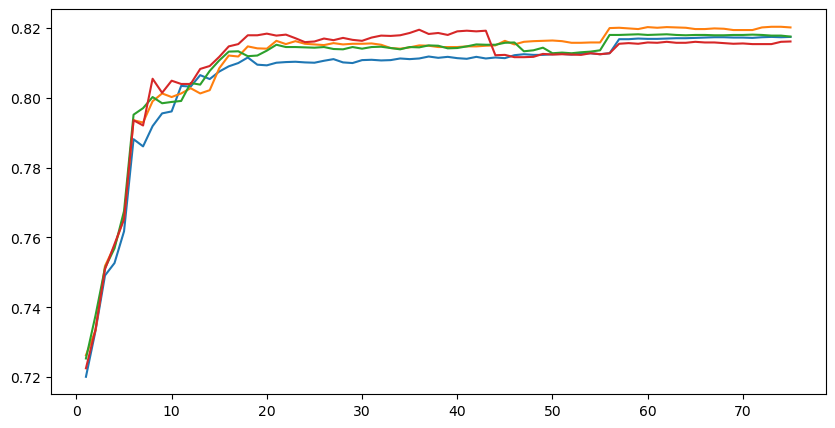

In [111]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show()

In [112]:
# FINDINGS 1 - WITH ABOUT 15 ESTIMATORS, WE CAN GET AN OPTIMISED LOGISTIC REGRESSION MODEL
# FINDINGS 2 - WITH ABOUT 41-45 ESTIMATORS WE CAN GET THE BEST LOGISTIC REGRESSION MODEL

In [113]:
rfecv.n_features_

74

## D. REBUILDING THE MODEL WITH OPTIMUM NUMBER OF VARIABLES

In [114]:
from sklearn.feature_selection import RFE

In [115]:
rfe = RFE(estimator=logreg_smt_tmk_rfe, n_features_to_select=16)

In [116]:
rfe.fit(X_train_smt_tmk, y_train_smt_tmk)

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=16)

In [117]:
rfe.ranking_

array([29,  2, 47,  9,  8, 37, 21, 30, 49, 10,  1,  6,  1, 15, 34, 27, 56,
       26, 39,  1, 44, 24, 17, 16, 48, 23, 45,  4, 32, 50, 57, 20,  1,  1,
       11, 12, 14,  1, 19, 42, 53, 13,  1,  1, 54, 31,  1, 28, 43, 51,  3,
        1, 40, 38,  5,  1, 46, 35,  7,  1, 55, 36,  1,  1, 52,  1, 59, 25,
       22, 33, 18,  1, 60, 58, 41])

In [118]:
X_train.columns[rfe.support_]

Index(['roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'avg_rech_amt_6_7'],
      dtype='object')

In [119]:
X_train2 = X_train.loc[:,rfe.support_] ## loc[: --> all rows, the cols in rfe.support_]
X_train2.shape

(22789, 16)

In [120]:
X_train2.columns

Index(['roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'avg_rech_amt_6_7'],
      dtype='object')

**Evaluation using cross val score**

In [121]:
%%time
#cross_val_score(logreg, X_train2, y_train, n_jobs=-1)


# ASSIGNING THE CLASSIFIER TO BE USED
classifier = rfe

# CHECKING THE EVALUATION MATRICES

from sklearn.model_selection import cross_validate
scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(classifier, X_train2, y_train, cv=5, scoring=scoring, n_jobs=-1) # X_train2 instead of X_train

# PREPARING CLASSIFICATION REPORT

y_train_pred_cv = cross_val_predict(classifier, X_train2, y_train, cv=5) # CALCULATES CLASSIFICATIOIN REPORT


# PRINGING THE SCORES

for metric in scoring:
    print(f"{metric}: {scores['test_' + metric].mean()}")
    
print ('Classification Report -  \n',classification_report(y_train, y_train_pred_cv))

precision: 0.275
recall: 0.004278088459583122
roc_auc: 0.8551615774141194
Classification Report -  
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     21387
           1       0.40      0.00      0.01      1402

    accuracy                           0.94     22789
   macro avg       0.67      0.50      0.49     22789
weighted avg       0.91      0.94      0.91     22789

Wall time: 914 ms


In [122]:
import statsmodels.api as sm

In [123]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              sep_churn   No. Observations:                22789
Model:                            GLM   Df Residuals:                    22772
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3958.0
Date:                Tue, 11 Jul 2023   Deviance:                       7916.0
Time:                        22:04:53   Pearson chi2:                 8.54e+09
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1085
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2047      0.058    -20.760      0.000      -1.318      -1.091
roam_og_mou_8          4.6748      0.803      5.819      0.000       3.100       6.249
loc_og_t2m_mou_8      -4.6344      3.219     -1.440      0.150     -10.944       1.675
loc_og_mou_8          -8.7760      4.978     -1.763      0.078     -18.532       0.980
total_og_mou_7         4.2650      0.727      5.864      0.000       2.840       5.691
total_og_mou_8       -14.9094      1.724     -8.650      0.000     -18.288     -11.531
loc_ic_mou_8         -16.7004      3.431     -4.868      0.000     -23.425      -9.976
total_ic_mou_7         8.3405      1.122      7.435      0.000       6.142      10.539
total_ic_mou_8       -14.6453      2.720     -5.385      0.000     -19.976      -9.315
spl_ic_mou_8         -16.5009      2.881     -5.728      0.000     -22.147     -10.855
total_rech_amt_8     -12.2289      3.214     -3.805      0.000     -18.528      -5.929
last_day_rch_amt_8   -17.3126      2.212     -7.828      0.000     -21.647     -12.978
vol_3g_mb_8          -10.7520      3.931     -2.735      0.006     -18.456      -3.048
monthly_2g_8          -5.8062      0.935     -6.211      0.000      -7.638      -3.974
sachet_2g_8           -8.2793      1.384     -5.983      0.000     -10.992      -5.567
monthly_3g_8         -11.7062      2.855     -4.101      0.000     -17.301      -6.111
avg_rech_amt_6_7      16.4726      1.879      8.769      0.000      12.791      20.154
======================================================================================
"""

In [124]:
# DROPPING COL. WITH HIGH P VALUE-  loc_og_t2m_mou_8
X_train2 = X_train2.drop(["loc_og_t2m_mou_8"], axis = 1)

In [125]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              sep_churn   No. Observations:                22789
Model:                            GLM   Df Residuals:                    22773
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3959.0
Date:                Tue, 11 Jul 2023   Deviance:                       7918.0
Time:                        22:04:53   Pearson chi2:                 9.01e+09
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1085
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2067      0.058    -20.790      0.000      -1.320      -1.093
roam_og_mou_8          4.7298      0.804      5.880      0.000       3.153       6.306
loc_og_mou_8         -14.7574      3.292     -4.482      0.000     -21.210      -8.305
total_og_mou_7         4.2734      0.728      5.873      0.000       2.847       5.700
total_og_mou_8       -14.8268      1.725     -8.596      0.000     -18.207     -11.446
loc_ic_mou_8         -17.0824      3.431     -4.979      0.000     -23.807     -10.358
total_ic_mou_7         8.3515      1.123      7.434      0.000       6.150      10.554
total_ic_mou_8       -14.6013      2.716     -5.375      0.000     -19.925      -9.277
spl_ic_mou_8         -16.5177      2.881     -5.733      0.000     -22.165     -10.870
total_rech_amt_8     -12.4323      3.221     -3.860      0.000     -18.745      -6.120
last_day_rch_amt_8   -17.3694      2.214     -7.845      0.000     -21.709     -13.030
vol_3g_mb_8          -10.6906      3.927     -2.722      0.006     -18.387      -2.994
monthly_2g_8          -5.8026      0.935     -6.207      0.000      -7.635      -3.970
sachet_2g_8           -8.2922      1.384     -5.992      0.000     -11.005      -5.580
monthly_3g_8         -11.6952      2.854     -4.098      0.000     -17.289      -6.101
avg_rech_amt_6_7      16.4763      1.878      8.772      0.000      12.795      20.158
======================================================================================
"""

- p-values SEEMS TO BE WITHIN LIMIT FOR THE OPTIMISED LINEAR MODEL

#### CHECKING VIFS

In [126]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_ic_mou_8,11.20
4,loc_ic_mou_8,8.20
8,total_rech_amt_8,7.80
3,total_og_mou_8,7.21
2,total_og_mou_7,5.46
5,total_ic_mou_7,5.36
14,avg_rech_amt_6_7,3.52
1,loc_og_mou_8,2.43
10,vol_3g_mb_8,2.23
13,monthly_3g_8,2.20


In [128]:
# DROPPING COL. WITH HIGH VIF VALUE-  loc_ic_mou_8 - TOTAL RECHARGE AMOUNT IS SIGNIFICANT FROM BUSINESS POINT OF VIEW
X_train2 = X_train2.drop(["loc_ic_mou_8"], axis = 1)

In [129]:
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_rech_amt_8,7.80
3,total_og_mou_8,7.16
5,total_ic_mou_8,5.58
2,total_og_mou_7,5.46
4,total_ic_mou_7,5.34
13,avg_rech_amt_6_7,3.52
1,loc_og_mou_8,2.24
9,vol_3g_mb_8,2.23
12,monthly_3g_8,2.20
8,last_day_rch_amt_8,1.86


In [130]:
## THE VIFs ARE WITHIN LIMIT.
##'total_rech_amt_8' HAS SLIGHTLY HIGH VIF. BUT WE HAVE DECIDED TO KEEP IT AS IT IS EASY TO INTERPRETE.

In [131]:
# DROPPING COL. WITH HIGH VIF VALUE-  total_og_mou_8 - TOTAL RECHARGE AMOUNT IS SIGNIFICANT FROM BUSINESS POINT OF VIEW
X_train2 = X_train2.drop(["total_og_mou_8"], axis = 1)

In [132]:
X_train2.shape

(22789, 13)

In [133]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              sep_churn   No. Observations:                22789
Model:                            GLM   Df Residuals:                    22775
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4007.2
Date:                Tue, 11 Jul 2023   Deviance:                       8014.4
Time:                        22:04:54   Pearson chi2:                 1.59e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1047
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1678      0.057    -20.350      0.000      -1.280      -1.055
roam_og_mou_8          8.1694      0.738     11.066      0.000       6.722       9.616
loc_og_mou_8         -21.4345      3.114     -6.884      0.000     -27.537     -15.332
total_og_mou_7         0.6897      0.595      1.159      0.246      -0.476       1.856
total_ic_mou_7         9.7916      1.119      8.748      0.000       7.598      11.985
total_ic_mou_8       -27.4507      2.121    -12.941      0.000     -31.608     -23.293
spl_ic_mou_8         -16.9271      2.889     -5.859      0.000     -22.590     -11.264
total_rech_amt_8     -32.6772      2.524    -12.948      0.000     -37.624     -27.731
last_day_rch_amt_8   -16.5907      2.278     -7.281      0.000     -21.056     -12.125
vol_3g_mb_8           -9.6952      3.945     -2.457      0.014     -17.428      -1.962
monthly_2g_8          -5.1414      0.936     -5.491      0.000      -6.977      -3.306
sachet_2g_8           -7.5944      1.378     -5.510      0.000     -10.296      -4.893
monthly_3g_8          -9.2348      2.881     -3.205      0.001     -14.882      -3.588
avg_rech_amt_6_7      21.9041      1.866     11.735      0.000      18.246      25.562
======================================================================================
"""

In [134]:
# DROPPING COL. WITH HIGH p-VALUE-  total_og_mou_7 - TOTAL RECHARGE AMOUNT IS SIGNIFICANT FROM BUSINESS POINT OF VIEW
X_train2 = X_train2.drop(["total_og_mou_7"], axis = 1)

In [135]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              sep_churn   No. Observations:                22789
Model:                            GLM   Df Residuals:                    22776
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4007.9
Date:                Tue, 11 Jul 2023   Deviance:                       8015.8
Time:                        22:04:54   Pearson chi2:                 1.42e+11
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1046
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1432      0.053    -21.480      0.000      -1.248      -1.039
roam_og_mou_8          7.9561      0.714     11.145      0.000       6.557       9.355
loc_og_mou_8         -21.5927      3.125     -6.910      0.000     -27.718     -15.468
total_ic_mou_7         9.9454      1.114      8.924      0.000       7.761      12.130
total_ic_mou_8       -27.7800      2.107    -13.183      0.000     -31.910     -23.650
spl_ic_mou_8         -16.9481      2.891     -5.862      0.000     -22.615     -11.282
total_rech_amt_8     -31.8505      2.411    -13.212      0.000     -36.575     -27.126
last_day_rch_amt_8   -16.7700      2.270     -7.388      0.000     -21.219     -12.321
vol_3g_mb_8          -10.1769      3.947     -2.579      0.010     -17.912      -2.442
monthly_2g_8          -5.2084      0.935     -5.569      0.000      -7.041      -3.375
sachet_2g_8           -7.6516      1.376     -5.561      0.000     -10.348      -4.955
monthly_3g_8          -9.5422      2.883     -3.309      0.001     -15.193      -3.891
avg_rech_amt_6_7      22.8641      1.654     13.820      0.000      19.621      26.107
======================================================================================
"""

In [136]:
# OBSERVATION - ALL p-VALUES ARE WITHIN LIMIT

In [137]:
# CHECKING VIFs

vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_ic_mou_8,5.49
2,total_ic_mou_7,5.08
5,total_rech_amt_8,5.01
11,avg_rech_amt_6_7,2.94
7,vol_3g_mb_8,2.21
10,monthly_3g_8,2.14
1,loc_og_mou_8,1.99
6,last_day_rch_amt_8,1.80
8,monthly_2g_8,1.20
0,roam_og_mou_8,1.12


In [138]:
# OBSERVATION - ALL VIFs ARE WITHIN LIMIT

In [139]:
# Getting the predicted values on the train set
y_train_pred = logm1.fit().predict(sm.add_constant(X_train2))
y_train_pred[:10]

86829    0.044297
22803    0.002410
61049    0.006857
99657    0.019635
73872    0.006004
72118    0.057285
4648     0.015571
42668    0.026431
87186    0.252942
73307    0.006020
dtype: float64

In [140]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04429692, 0.00240966, 0.006857  , 0.01963538, 0.00600444,
       0.05728453, 0.01557101, 0.02643093, 0.2529421 , 0.0060203 ])

## PLOTTING ROC CURVE

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [141]:
y_train_pred_final = pd.DataFrame({'Sep_Churn':y_train.values, 'Churn_Prob':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Sep_Churn,Churn_Prob
0,0,0.044297
1,0,0.002410
2,0,0.006857
3,0,0.019635
4,0,0.006004


In [142]:
from sklearn import metrics

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [144]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Sep_Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

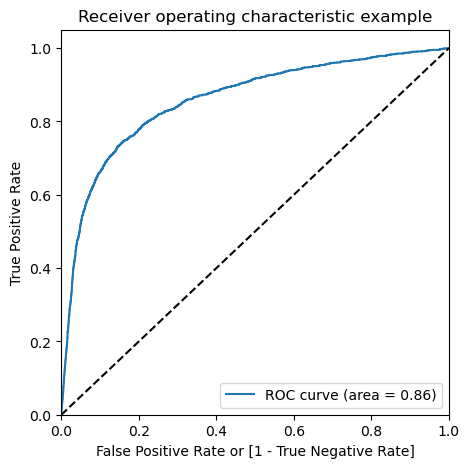

In [145]:
draw_roc(y_train_pred_final.Sep_Churn, y_train_pred_final.Churn_Prob)

#### FINDING OPTIMAL CUTOFF POINT

In [146]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Sep_Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.044297,1,0,0,0,0,0,0,0,0,0
1,0,0.002410,1,0,0,0,0,0,0,0,0,0
2,0,0.006857,1,0,0,0,0,0,0,0,0,0
3,0,0.019635,1,0,0,0,0,0,0,0,0,0
4,0,0.006004,1,0,0,0,0,0,0,0,0,0


In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Sep_Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.061521  1.000000  0.000000
0.1   0.1  0.845145  0.732525  0.852527
0.2   0.2  0.922945  0.529957  0.948707
0.3   0.3  0.936417  0.268188  0.980222
0.4   0.4  0.937953  0.111983  0.992098
0.5   0.5  0.938304  0.055635  0.996166
0.6   0.6  0.938567  0.029957  0.998130
0.7   0.7  0.938962  0.017118  0.999392
0.8   0.8  0.938742  0.008559  0.999719
0.9   0.9  0.938830  0.006419  0.999953


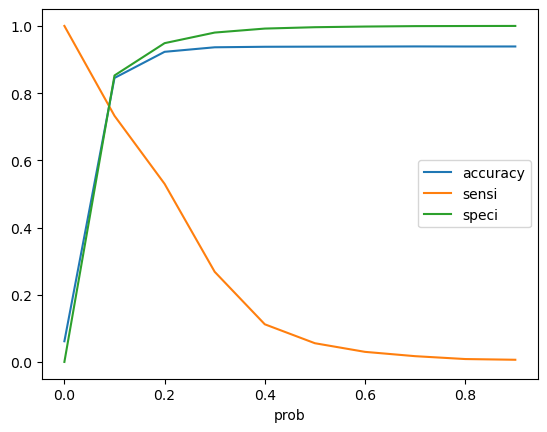

In [148]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [149]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head(10)

,Sep_Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.044297,1,0,0,0,0,0,0,0,0,0,0
1,0,0.002410,1,0,0,0,0,0,0,0,0,0,0
2,0,0.006857,1,0,0,0,0,0,0,0,0,0,0
3,0,0.019635,1,0,0,0,0,0,0,0,0,0,0
4,0,0.006004,1,0,0,0,0,0,0,0,0,0,0
5,0,0.057285,1,0,0,0,0,0,0,0,0,0,0
6,0,0.015571,1,0,0,0,0,0,0,0,0,0,0
7,0,0.026431,1,0,0,0,0,0,0,0,0,0,0
8,1,0.252942,1,1,1,0,0,0,0,0,0,0,1
9,0,0.006020,1,0,0,0,0,0,0,0,0,0,0


In [150]:
print ('Recall: ', recall_score(y_train_pred_final.Sep_Churn, y_train_pred_final.final_predicted))
print ('Precision: ', precision_score(y_train_pred_final.Sep_Churn, y_train_pred_final.final_predicted))
print ('\n clasification report:\n', classification_report(y_train_pred_final.Sep_Churn, y_train_pred_final.final_predicted))

Recall:  0.7325249643366619
Precision:  0.24563501554651998

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     21387
           1       0.25      0.73      0.37      1402

    accuracy                           0.85     22789
   macro avg       0.61      0.79      0.64     22789
weighted avg       0.93      0.85      0.88     22789



In [151]:
#OBSERVATION - WE HAVE NOW GOT A MODEL WITH HIGH RECALL VALUE WHICH IS THE REQUIREMENT.

## PRECISION RECALL TRADEOFF

In [152]:
from sklearn.metrics import precision_recall_curve

In [153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Sep_Churn, y_train_pred_final.Churn_Prob)

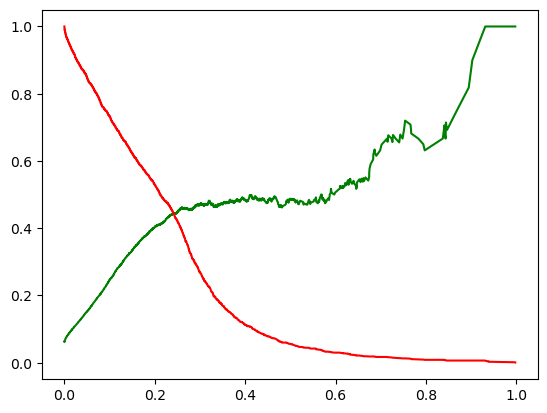

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

WE SHALL NOT GO WITH 0.3 THRESHOLD, SINCE THIS WILL REDUCE THE RECALL VALUE.

AS RETAINING EXISTING CUSTOMERS IS CHEAPER, WE ARE OKAY WITH GIVING AWAY SOME OFFERS TO EXISTING CUSOTMERS WHO ARE ACTUALLY NOT GOING TO CHURN

#### FINAL REGRESSION MODEL


THE MOST IMPORTANT PARAMETERS ARE -


- total_ic_mou_8
- total_ic_mou_7
- total_rech_amt_8
- avg_rech_amt_6_7
- vol_3g_mb_8
- monthly_3g_8
- loc_og_mou_8
- last_day_rch_amt_8
- monthly_2g_8
- roam_og_mou_8
- sachet_2g_8
- spl_ic_mou_8

THRESHOLD VALUE IS 0.1


## E. RANDOM FOREST WITH Hyper-parameter tuning using Cross Validation

### RandomizedSearchCV

RANDOMIZEDSEARCHCV IS A HIGHLY EFFICIENT TECHNIQUE THAT IS USED TO IDENTIFY THE BEST SET OF HYPERPARAMETER VALUES IN A FEWER NUMBER OF ITERATIONS. THIS TECHNIQUE PERFORMS QUITE WELL AT A REDUCED COST AND A SHORTER TIME FOR HUGE DATA SETS AND MODELS WITH LARGE NUMBERS OF HYPERPARAMETERS.

RANDOMIZED SEARCH CV IS SIMILAR TO GRID SEARCH CV BUT RANDOMLY TAKES SAMPLES OF PARAMETER COMBINATIONS FROM ALL POSSIBLE PARAMETER COMBINATIONS.

In [155]:
from sklearn.model_selection import RandomizedSearchCV

In [156]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50), # 20 TO 400 IN STEPS OF 50
                'n_estimators': range(10, 101, 10)}

In [157]:
model_rcv = RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=40) # IT WILL ONLY DO 40 ITERATIONS AND NOT ALL ITERATIONS

In [158]:
%%time
model_rcv.fit(X_train_smt_tmk, y_train_smt_tmk)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Wall time: 9min 59s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=50,
                                                    oob_score=True,
                                                    random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   return_train_score=True, verbose=1)

In [159]:
model_rcv.best_score_

0.9265668849391956

In [160]:
model_rcv.best_estimator_

RandomForestClassifier(max_depth=19, max_features=15, min_samples_leaf=20,
                       n_estimators=40, oob_score=True, random_state=42)

In [161]:
cv_df = pd.DataFrame(model_rcv.cv_results_)

In [162]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
12,18.897749,0.250564,0.109349,0.009878,40,20,15,19,"{'n_estimators': 40, 'min_samples_leaf': 20, '...",0.903181,0.931829,0.929373,0.938377,0.930075,0.926567,0.012118,1,0.948784,0.943551,0.942060,0.941563,0.942470,0.943686,0.002632
3,15.527479,0.416226,0.125252,0.024275,40,20,12,15,"{'n_estimators': 40, 'min_samples_leaf': 20, '...",0.901777,0.930075,0.929256,0.935921,0.927853,0.924977,0.011921,2,0.947585,0.941680,0.940569,0.940394,0.939400,0.941926,0.002921
21,21.900117,0.261170,0.228070,0.033650,100,20,10,8,"{'n_estimators': 100, 'min_samples_leaf': 20, ...",0.887278,0.910080,0.909846,0.917563,0.912301,0.907413,0.010444,3,0.922591,0.915108,0.914640,0.914757,0.915955,0.916610,0.003026
4,22.504376,0.432524,0.168194,0.016358,60,70,12,17,"{'n_estimators': 60, 'min_samples_leaf': 70, '...",0.879093,0.908326,0.905051,0.909963,0.906338,0.901754,0.011454,4,0.913851,0.909875,0.908764,0.907712,0.909583,0.909957,0.002087
15,16.396156,0.277445,0.249942,0.026139,100,70,6,13,"{'n_estimators': 100, 'min_samples_leaf': 70, ...",0.879560,0.905753,0.901310,0.910781,0.903531,0.900187,0.010781,5,0.914435,0.907536,0.907565,0.905139,0.906922,0.908320,0.003183


THE ABOVE TABLE IS TOO CROWDED. LET US SELECT ONLY THE COLUMNS THAT MATTERS TO US

In [163]:
sel_cols = ['param_max_depth','param_max_features','param_min_samples_leaf','param_n_estimators', 'rank_test_score',  'mean_test_score']

In [164]:
# CLEAN CV TABLE WITH ONLY THE IMPORTANT PARAMETERS
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)

,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,rank_test_score,mean_test_score
12,19,15,20,40,1,0.926567
3,15,12,20,40,2,0.924977
21,8,10,20,100,3,0.907413
4,17,12,70,60,4,0.901754
15,13,6,70,100,5,0.900187
31,18,3,70,100,6,0.896305
0,15,8,120,70,7,0.893078
25,11,11,120,100,8,0.892844
22,16,12,120,70,9,0.892774
6,6,15,120,50,10,0.887161


INFERENCE:

THE DIFFERENCE IN PERFORMANCE OF THE TOP 20 MODELS ARE VERY SIMILAR. 0.94XXX. IF WE WANT A DECENT MODEL CONSIDERING ALSO THE COMPUTATIONAL POWER, WE CAN CONSIDER ANY MODEL IN THE LIST.
FOR THE CURRENT CASE, WE SHALL MOVE AHEAD WITH THE BEST MODEL.

In [165]:
rf_best = model_rcv.best_estimator_

In [166]:
rf_best

RandomForestClassifier(max_depth=19, max_features=15, min_samples_leaf=20,
                       n_estimators=40, oob_score=True, random_state=42)

In [167]:
## E. FITTING THE BEST RANDOM FOREST MODEL

In [168]:
rf = RandomForestClassifier(random_state=42, n_estimators=90, max_depth = 19, max_features = 13, min_samples_leaf=20,   oob_score=True)

In [169]:
%%time
rf_best.fit(X_train, y_train)

Wall time: 7.26 s


RandomForestClassifier(max_depth=19, max_features=15, min_samples_leaf=20,
                       n_estimators=40, oob_score=True, random_state=42)

In [170]:
y_train_pred = rf_best.predict(X_train)

**E. MODEL EVALUATION ON TRAIN SET**

In [171]:
print ('Accuracy: ', accuracy_score(y_train, y_train_pred))
print ('F1 score: ', f1_score(y_train, y_train_pred))
print ('Recall: ', recall_score(y_train, y_train_pred))
print ('Precision: ', precision_score(y_train, y_train_pred))
print ('\n clasification report:\n', classification_report(y_train, y_train_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_train, y_train_pred))

Accuracy:  0.9538812585019089
F1 score:  0.4959232613908873
Recall:  0.36875891583452214
Precision:  0.7569546120058566

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     21387
           1       0.76      0.37      0.50      1402

    accuracy                           0.95     22789
   macro avg       0.86      0.68      0.74     22789
weighted avg       0.95      0.95      0.95     22789


 confussion matrix:
 [[21221   166]
 [  885   517]]


**E. MODEL EVALUATION ON TRAIN SET WITH CROSS VALIDATION**

In [172]:
%%time

# ASSIGNING THE CLASSIFIER TO BE USED
classifier = rf_best

# CHECKING THE EVALUATION MATRICES

from sklearn.model_selection import cross_validate
scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(classifier, X_train, y_train, cv=5, scoring=scoring)

y_train_pred_cv = cross_val_predict(classifier, X_train, y_train, cv=5) # CALCULATES CLASSIFICATIOIN REPORT


# PRINGING THE SCORES

for metric in scoring:
    print(f"{metric}: {scores['test_' + metric].mean()}")
    
print ('Classification Report -  \n',classification_report(y_train, y_train_pred_cv))

precision: 0.6317185351330961
recall: 0.28391967463141843
roc_auc: 0.9059569838288664
Classification Report -  
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     21387
           1       0.63      0.28      0.39      1402

    accuracy                           0.95     22789
   macro avg       0.79      0.64      0.68     22789
weighted avg       0.93      0.95      0.94     22789

Wall time: 1min 3s


In [173]:
## OBSERVATION - ON TRAIN SET, RANDOM FOREST GAVE WORSE RESULTS THAN LOGISTIC REGRESSION

### Understand better the effect of Hyper-parameter

In [174]:
cv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_min_samples_leaf', 'param_max_features',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

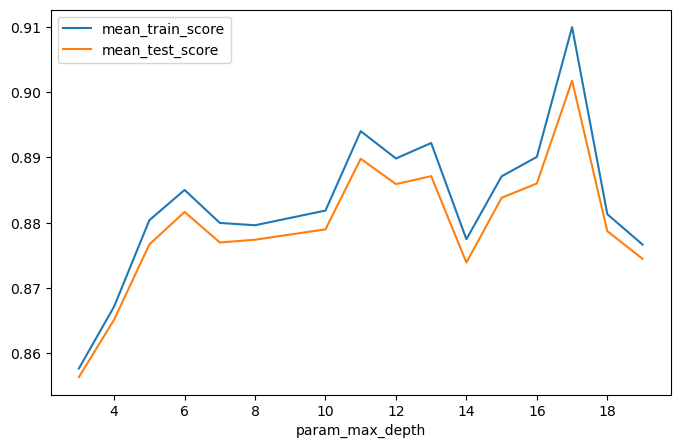

In [175]:
cv_df.groupby('param_max_depth')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

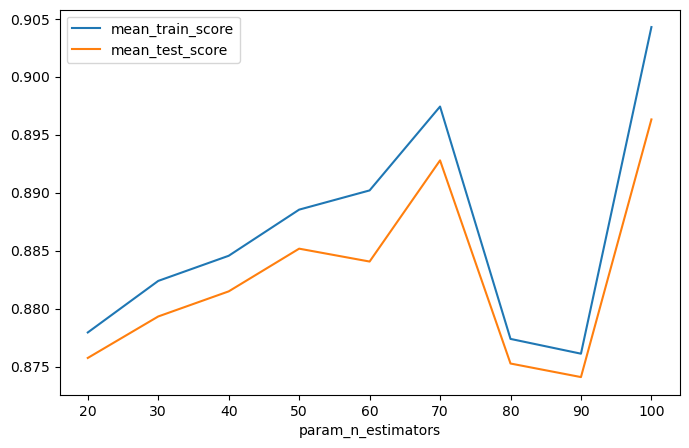

In [176]:
cv_df.groupby('param_n_estimators')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

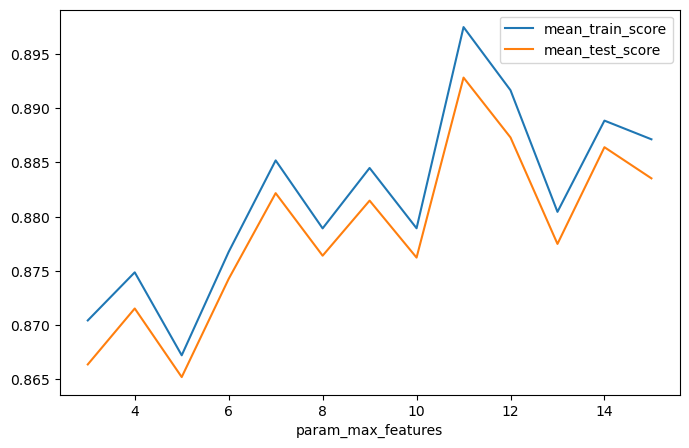

In [177]:
cv_df.groupby('param_max_features')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

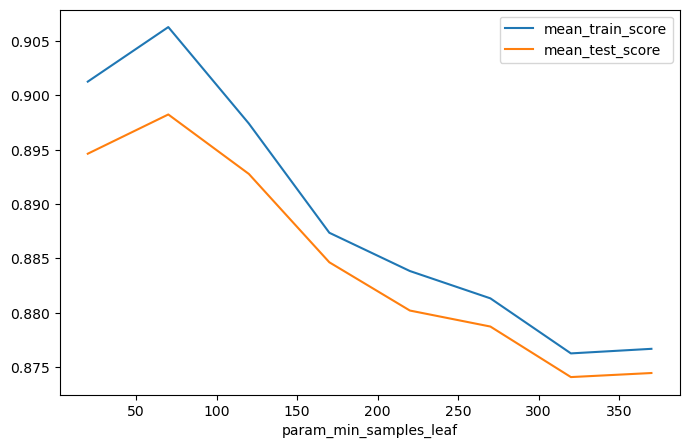

In [178]:
cv_df.groupby('param_min_samples_leaf')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

## MODEL EVALUATION ON TEST SET

## EVALUATION OF D. LOGISTIC REGRESSION MODEL

In [179]:
col = X_train2.columns
col

Index(['roam_og_mou_8', 'loc_og_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'avg_rech_amt_6_7'],
      dtype='object')

In [180]:
X_test_logreg = X_test[col]
X_test_logreg.head()

,roam_og_mou_8,loc_og_mou_8,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_8,total_rech_amt_8,last_day_rch_amt_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,avg_rech_amt_6_7
4856,0.000000,0.001233,0.026994,0.003160,0.0,0.006273,0.000000,0.000000,0.0,0.000000,0.000,0.009820
49284,0.000000,0.008422,0.020639,0.028384,0.0,0.021416,0.006743,0.000000,0.0,0.113636,0.000,0.003455
68526,0.000000,0.028914,0.046954,0.074656,0.0,0.019162,0.004495,0.000000,0.0,0.000000,0.000,0.004434
55488,0.040608,0.002951,0.000000,0.005463,0.0,0.014359,0.015060,0.000000,0.0,0.000000,0.000,0.005848
58252,0.000000,0.023250,0.012912,0.024570,0.0,0.081549,0.056642,0.027414,0.0,0.000000,0.125,0.050839


In [181]:
X_test_sm = sm.add_constant(X_test_logreg)

**Making predictions on the test set**

In [182]:
# recall we predicted for the train set using the same formula - y_train_pred = res.predict(X_train_sm)
y_test_pred = logm1.fit().predict(X_test_sm)

In [183]:
y_test_pred[:10]

4856     0.275991
49284    0.029482
68526    0.018728
55488    0.166337
58252    0.002338
80205    0.028160
93846    0.048760
8913     0.066887
7895     0.088281
62935    0.008237
dtype: float64

In [184]:
y_test_pred = y_test_pred.values.reshape(-1)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [185]:
y_test_pred_final = pd.DataFrame({'Sep_Churn':y_test.values, 'Churn_Prob':y_test_pred})

y_test_pred_final.head()

,Sep_Churn,Churn_Prob
0,1,0.275991
1,0,0.029482
2,0,0.018728
3,0,0.166337
4,0,0.002338


In [186]:
# USING THRESHOLD VALUE OF 0.1

y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_final.head(10)

,Sep_Churn,Churn_Prob,final_predicted
0,1,0.275991,1
1,0,0.029482,0
2,0,0.018728,0
3,0,0.166337,1
4,0,0.002338,0
5,0,0.028160,0
6,0,0.048760,0
7,0,0.066887,0
8,1,0.088281,0
9,0,0.008237,0


In [187]:
print ('Recall: ', recall_score(y_test_pred_final.Sep_Churn, y_test_pred_final.final_predicted))
print ('Precision: ', precision_score(y_test_pred_final.Sep_Churn, y_test_pred_final.final_predicted))
print ('\n clasification report:\n', classification_report(y_test_pred_final.Sep_Churn, y_test_pred_final.final_predicted))

Recall:  0.7777777777777778
Precision:  0.2573044297832234

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      5347
           1       0.26      0.78      0.39       351

    accuracy                           0.85      5698
   macro avg       0.62      0.82      0.65      5698
weighted avg       0.94      0.85      0.88      5698



In [188]:
## OBSERVATION - THE LOGISTICE REGRESSION MODEL WORKED EQUALLY WELL ON TRAIN AND TEST DATA.

## EVALUATION OF E. RANDOM FOREST MODEL

In [189]:
y_test_pred = rf_best.predict(X_test)

In [190]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test, y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.9478764478764479
F1 score:  0.46098003629764067
Recall:  0.36182336182336183
Precision:  0.635

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5347
           1       0.64      0.36      0.46       351

    accuracy                           0.95      5698
   macro avg       0.80      0.67      0.72      5698
weighted avg       0.94      0.95      0.94      5698


 confussion matrix:
 [[5274   73]
 [ 224  127]]


BASED ON ABOVE OBSERVATIONS, SINCE LOGISTIC REGRESSION GIVES A BETTER RECALL VALUE, THEREFORE, FINALLY CONSIDERED MODEL IS D. LOGISTIC REGRESSION.

**RECOMMENDATIONS**

KEEP A TRACK OF THE MOST IMPORTANT PARAMETERS-


- total_ic_mou_8
- total_ic_mou_7
- total_rech_amt_8
- avg_rech_amt_6_7
- vol_3g_mb_8
- monthly_3g_8
- loc_og_mou_8
- last_day_rch_amt_8
- monthly_2g_8
- roam_og_mou_8
- sachet_2g_8
- spl_ic_mou_8

- THRESHOLD VALUE IS 0.1

- PROVIDE OFFRS TO CUSTOMERS WHO HAS A CHURN PROBABILITY OF MORE THAN 10%
- FOR TIMES WHEN CHURNING IS HIGH, COMPANY CAN TARGET EVEN SMALLER THRESHOLD E.G. 8%.